In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [7]:
df_sales = df.groupby('Year')['Automobile_Sales'].sum().reset_index()
df_sales.head()

,Year,Automobile_Sales
0,1980,8147.4
1,1981,7600.9
2,1982,7573.8
3,1983,34672.2
4,1984,35667.0


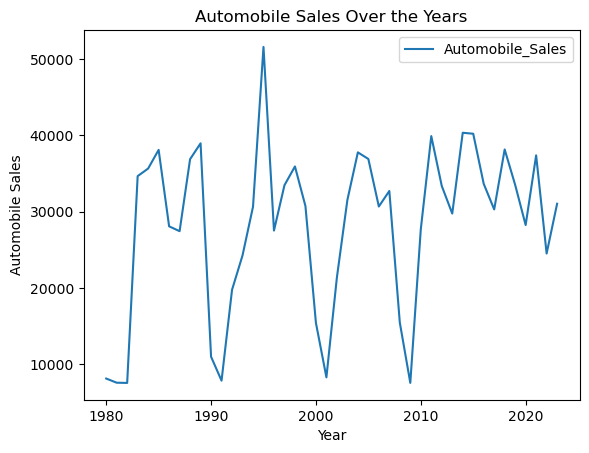

In [8]:
df_sales.plot(x='Year', y='Automobile_Sales', kind='line')
plt.title("Automobile Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.show()


<Figure size 1500x1000 with 0 Axes>

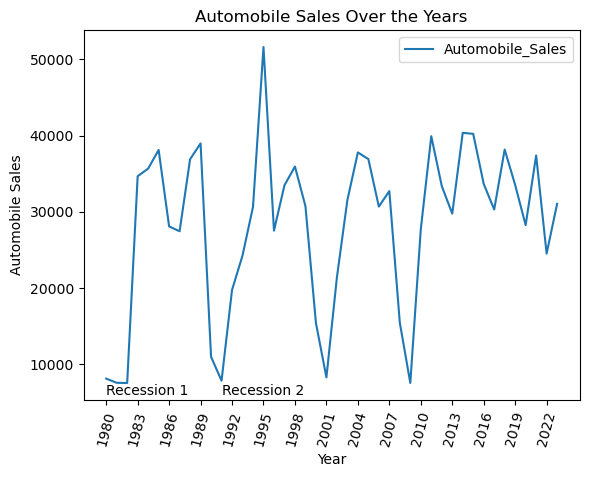

In [9]:
plt.figure(figsize=(15, 10))
df_sales.plot(x='Year', y='Automobile_Sales', kind='line')
plt.xticks(np.arange(1980, 2024, 3), rotation = 75)
plt.title("Automobile Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")

plt.text(1980, 6000, 'Recession 1')
plt.text(1991, 6000, 'Recession 2')
plt.show()

In [10]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [11]:
df_type = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
df_type.head()


,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,2882.5
1,1980,Smallfamiliycar,2085.7
2,1980,Supperminicar,3179.2
3,1981,Mediumfamilycar,1885.2
4,1981,Smallfamiliycar,3192.1


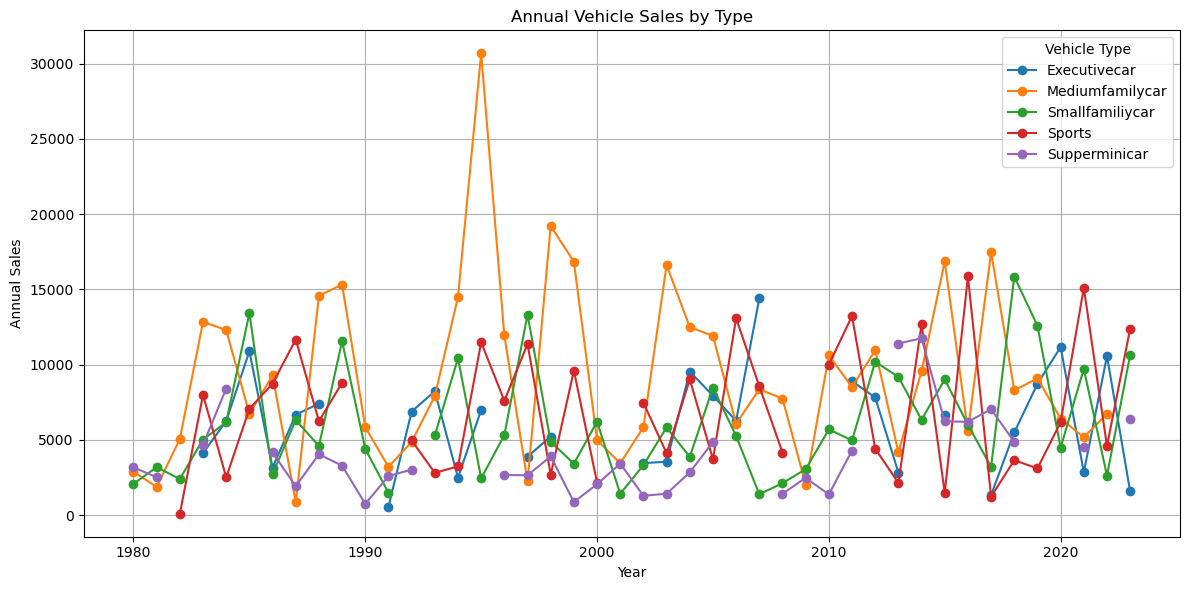

In [12]:
pivot_table = df_type.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')
pivot_table.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Annual Vehicle Sales by Type')
plt.xlabel('Year')
plt.ylabel('Annual Sales')
plt.grid(True)
  # Ensure that all years are marked on the x-axis
plt.legend(title='Vehicle Type')
plt.tight_layout()

# Show plot
plt.show()

Vehicle_Type
Executivecar       Axes(0.125,0.11;0.775x0.77)
Mediumfamilycar    Axes(0.125,0.11;0.775x0.77)
Smallfamiliycar    Axes(0.125,0.11;0.775x0.77)
Sports             Axes(0.125,0.11;0.775x0.77)
Supperminicar      Axes(0.125,0.11;0.775x0.77)
Name: Automobile_Sales, dtype: object

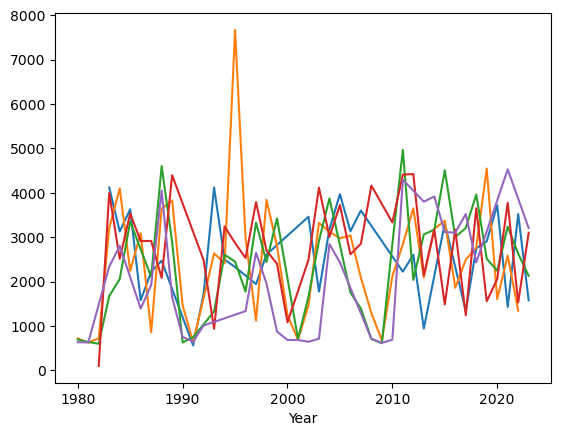

In [13]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')

In [14]:
df.head(10)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


In [15]:
df_recession = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
df_recession.head()


,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


<Axes: xlabel='Recession', ylabel='Automobile_Sales'>

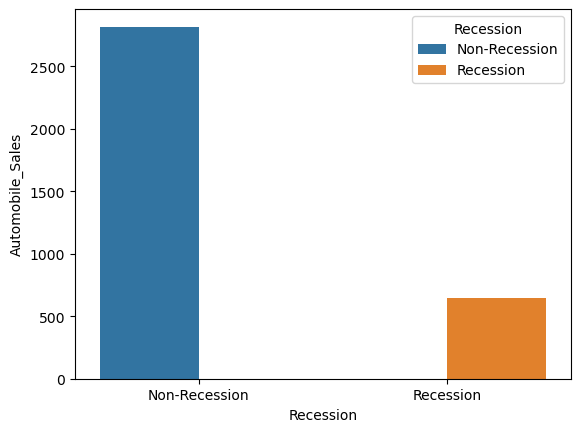

In [16]:
df_recession['Recession'] = df_recession['Recession'].map({1: 'Recession', 0: 'Non-Recession'})

sns.barplot(data=df_recession, x='Recession', y='Automobile_Sales', hue='Recession')

Text(0.5, 0, 'Recession')

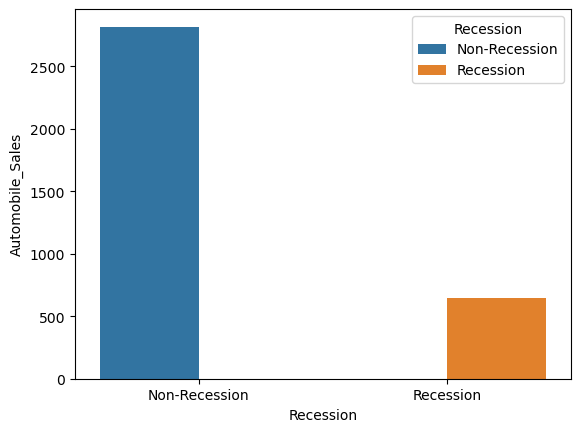

In [17]:
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=df_recession)
plt.xlabel('Recession')


In [18]:
df_type_recess = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
df_type_recess.head(20)

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,185364.10
1,0,Mediumfamilycar,369706.24
2,0,Smallfamiliycar,236728.60
3,0,Sports,264867.90
4,0,Supperminicar,112285.90
5,1,Executivecar,564.00
6,1,Mediumfamilycar,28343.60
7,1,Smallfamiliycar,23426.40
8,1,Sports,511.00
9,1,Supperminicar,20437.40


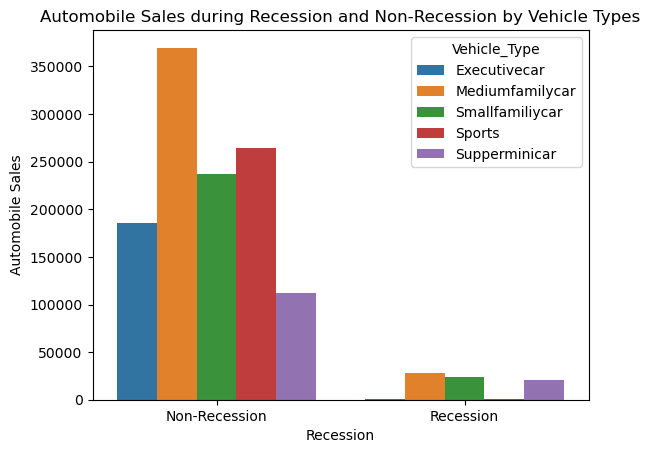

In [19]:
sns.barplot(data=df_type_recess, x='Recession', y='Automobile_Sales', hue='Vehicle_Type')

plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession and Non-Recession by Vehicle Types')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

In [20]:
df_mplot = df.groupby(['Recession', 'Year'])['GDP'].mean().reset_index()
df_mplot.tail(15)

,Recession,Year,GDP
36,0,2022,37.704167
37,0,2023,38.982917
38,1,1980,41.101917
39,1,1981,35.615250
40,1,1982,39.580667
41,1,1983,22.287000
42,1,1990,36.477182
43,1,1991,33.833250
44,1,1992,41.585333
45,1,2000,39.588111


In [21]:
df_recession0 = df_mplot[df_mplot['Recession']==0]
df_recession1 = df_mplot[df_mplot['Recession']==1]
df_recession1.head()



,Recession,Year,GDP
38,1,1980,41.101917
39,1,1981,35.615250
40,1,1982,39.580667
41,1,1983,22.287000
42,1,1990,36.477182


C:\Users\M-TT\AppData\Local\Temp\ipykernel_8820\2803759827.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


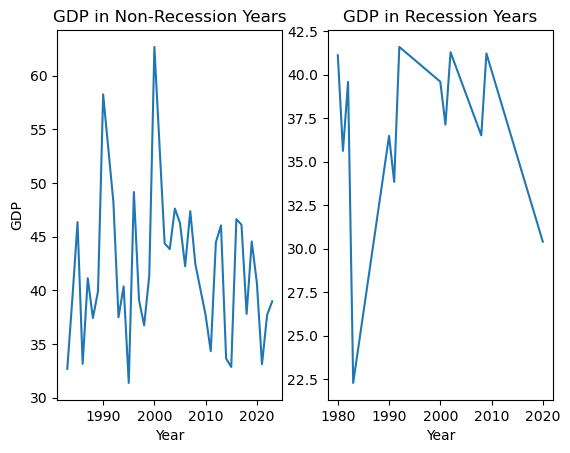

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(df_recession0['Year'], df_recession0['GDP'])
axes[0].set_title("GDP in Non-Recession Years")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')

axes[1].plot(df_recession1['Year'], df_recession1['GDP'])
axes[1].set_title("GDP in Recession Years")
axes[1].set_xlabel('Year')
fig.show()


In [23]:
df.head(20)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


In [24]:
df_season = df.groupby(['Recession','Month'])['Seasonality_Weight'].mean().reset_index()
df_season.head()

,Recession,Month,Seasonality_Weight
0,0,Apr,1.00
1,0,Aug,0.25
2,0,Dec,0.34
3,0,Feb,0.75
4,0,Jan,0.50


In [25]:
df_rec0 = df[df['Recession']==0]

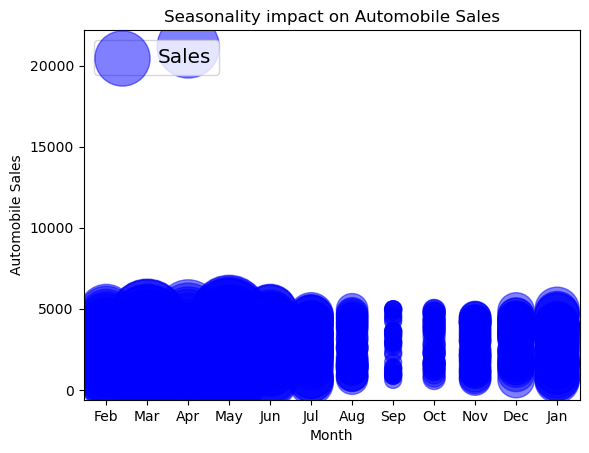

In [26]:
ax0 = df_rec0.plot(kind='scatter',
                    x='Month',
                    y='Automobile_Sales',
                    alpha=0.5,
                    color="blue",
                    s=df_rec0['Seasonality_Weight'] * 2000 + 10,
                    )

ax0.set_ylabel('Automobile Sales')
ax0.set_title('Seasonality impact on Automobile Sales')
ax0.legend(['Sales'], loc='upper left', fontsize='x-large')


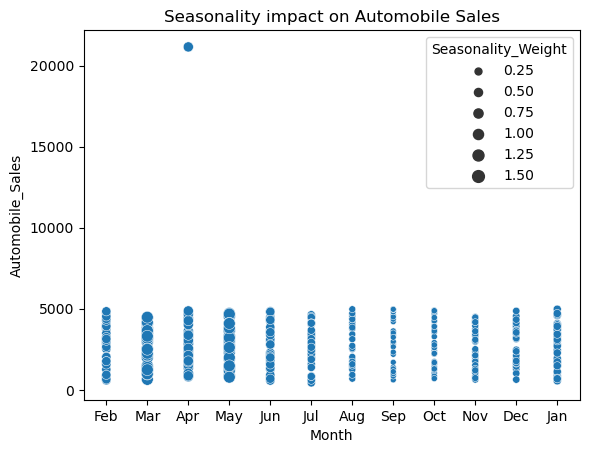

In [27]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    
    #you can further include hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

In [28]:
df_rec1 = df[df['Recession']==1]

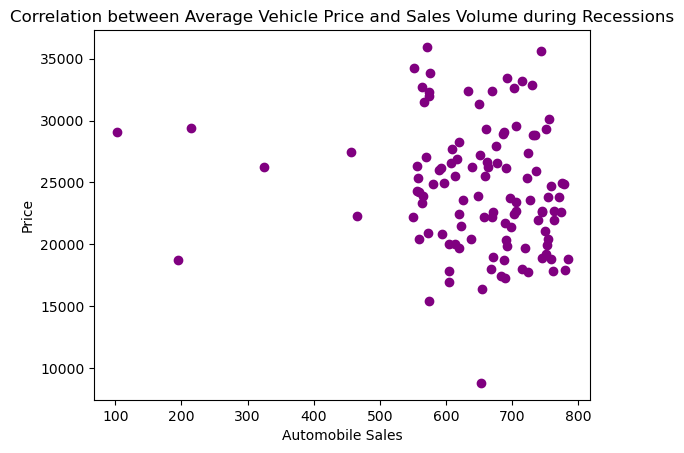

In [29]:
plt.scatter(x=df_rec1['Automobile_Sales'], y= df_rec1['Price'], color='purple', marker='o')
plt.xlabel('Automobile Sales')
plt.ylabel('Price')
plt.title('Correlation between Average Vehicle Price and Sales Volume during Recessions')
plt.show()

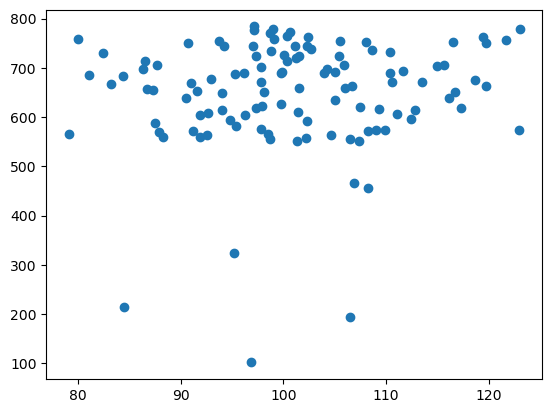

In [30]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    

In [31]:
df_ads = df.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()
df_ads.head()


,Recession,Advertising_Expenditure
0,0,1279707
1,1,339910


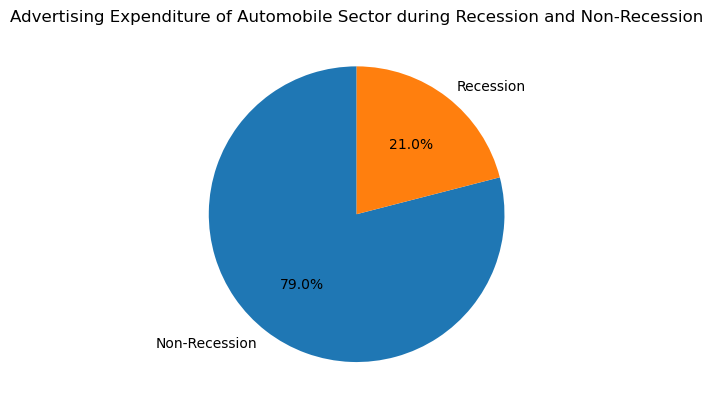

In [32]:
plt.pie(df_ads['Advertising_Expenditure'], labels=['Non-Recession', 'Recession'], autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure of Automobile Sector during Recession and Non-Recession')
plt.show()

In [33]:
df_adtype = df_rec1.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
df_adtype.head()

,Vehicle_Type,Advertising_Expenditure
0,Executivecar,3243
1,Mediumfamilycar,130612
2,Smallfamiliycar,102759
3,Sports,12568
4,Supperminicar,90728


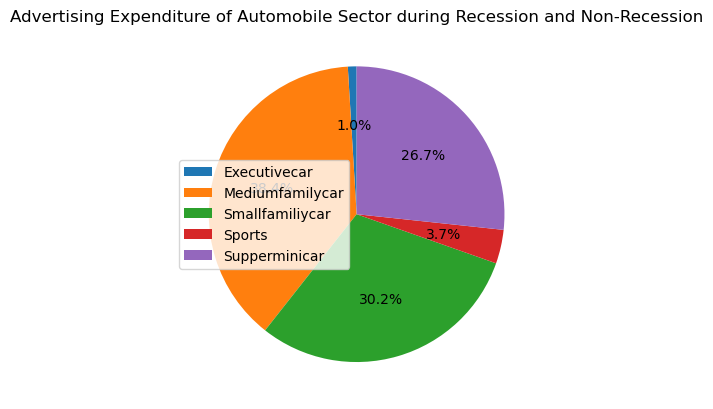

In [34]:
plt.pie(df_adtype['Advertising_Expenditure'], autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure of Automobile Sector during Recession and Non-Recession')
plt.legend(df_adtype['Vehicle_Type'])
plt.show()

C:\Users\M-TT\AppData\Local\Temp\ipykernel_8820\3579728138.py:1: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', data=df_rec1, style='Vehicle_Type', markers='o', err_style=None)
c:\Users\M-TT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\M-TT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


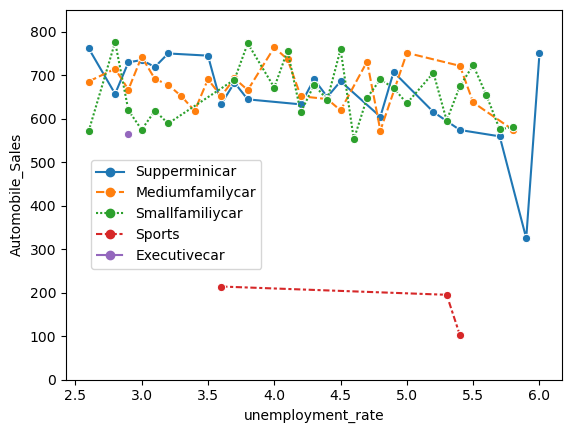

In [35]:
sns.lineplot(x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', data=df_rec1, style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.show()

In [36]:
import requests
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
response = requests.get(path)
 #Check if the request was successful
if response.status_code == 200:
    us_states_geojson = response.json()  # Load the JSON into a Python dictionary
    print("GeoJSON data successfully loaded.")
else:
    print("Failed to retrieve GeoJSON data from the URL.")

GeoJSON data successfully loaded.


In [37]:
# Filter the data for the recession period and specific cities

    # Calculate the total sales by city
sales_by_city = df_rec1.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= us_states_geojson,  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


    # Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

    # Display the map
map1

In [40]:
import plotly.express as px
unemp_data = df_rec1.groupby(['Vehicle_Type' , 'unemployment_rate'])['Automobile_Sales'].mean().reset_index()
figure=px.bar(unemp_data,
x='Vehicle_Type',
y='Automobile_Sales',
color='unemployment_rate', barmode='group',
labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
title='Effect of Unemployment Rate on Vehicle Type and Sales')
figure.show()


In [41]:
exp_rec= df_rec1.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
R_chart3 = px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type', title='Advertising Expenditures of different vehicle types')
R_chart3.show()

In [42]:
exp_rec= df_rec1.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
R_chart3 = px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type', title='Advertising Expenditures of different vehicle types')
R_chart3.show()